## importing necessary Libraries

In [1]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import gaussian_filter

In [2]:
from scipy.fft import fft, ifft

## Functions for image opertations,adding noise and filters

In [35]:
def blur(img, sigma):
    blurred_img = gaussian_filter(img, sigma=sigma)
    return blurred_img

In [34]:
def add_gaussian_noise(img, sigma):
	gauss = np.random.normal(50, sigma, np.shape(img))
	noisy_img = cv2.add(img, gauss)
	# noisy_img[noisy_img < 0] = 0
	# noisy_img[noisy_img > 255] = 255
	return noisy_img

In [5]:
def wiener_filter(img, kernel, K):
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

In [6]:
def gaussian_kernel(kernel_size = 3):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h

In [7]:
def rgb2gray(rgb):
	return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

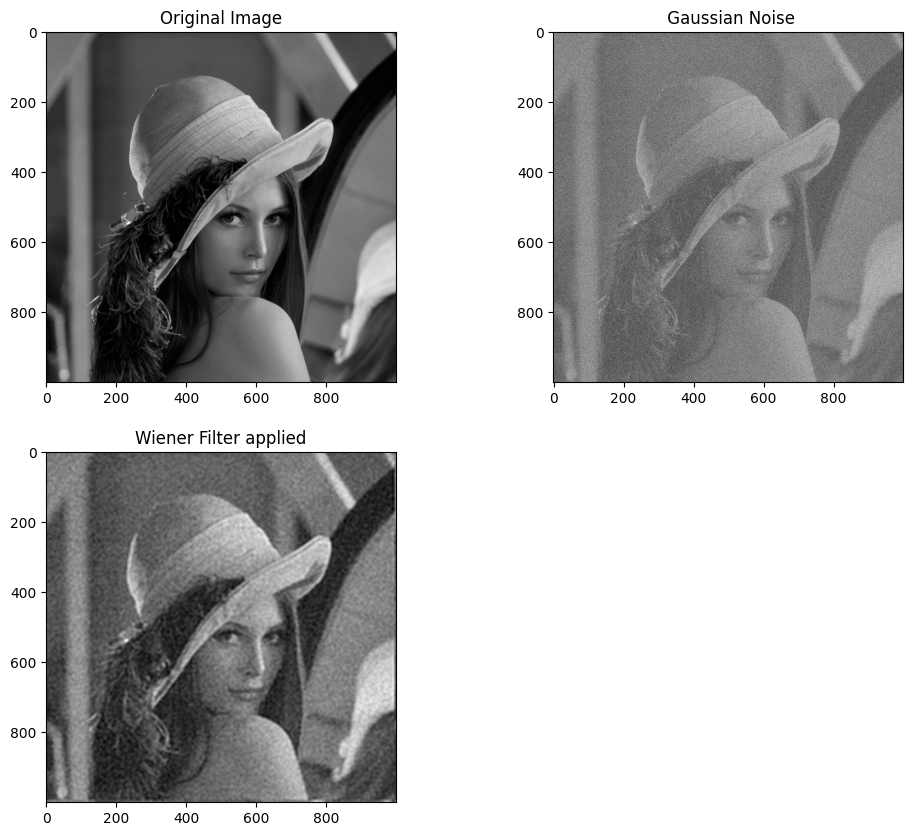

In [8]:
if __name__ == '__main__':
	# Load image and convert it to gray scale
	file_name = os.path.join('lena1000p.jpg') 
	img = rgb2gray(plt.imread(file_name))


	# Add Gaussian noise
	noisy_img = add_gaussian_noise(img, sigma =60)

	# Apply Wiener Filter
	kernel = gaussian_kernel(13)
	filtered_img = wiener_filter(noisy_img, kernel, K = 0.4)

	# Display results
	display = [img, noisy_img, filtered_img]
	label = ['Original Image', ' Gaussian Noise', 'Wiener Filter applied']

	fig = plt.figure(figsize=(12, 10))

	for i in range(len(display)):
		fig.add_subplot(2, 2, i+1)
		plt.imshow(display[i], cmap = 'gray')
		plt.title(label[i])

	plt.show()

## Output psnr has increassed

In [9]:
cv2.PSNR(img,noisy_img)

10.282809934011926

In [10]:
cv2.PSNR(img,filtered_img)

19.467899894013566

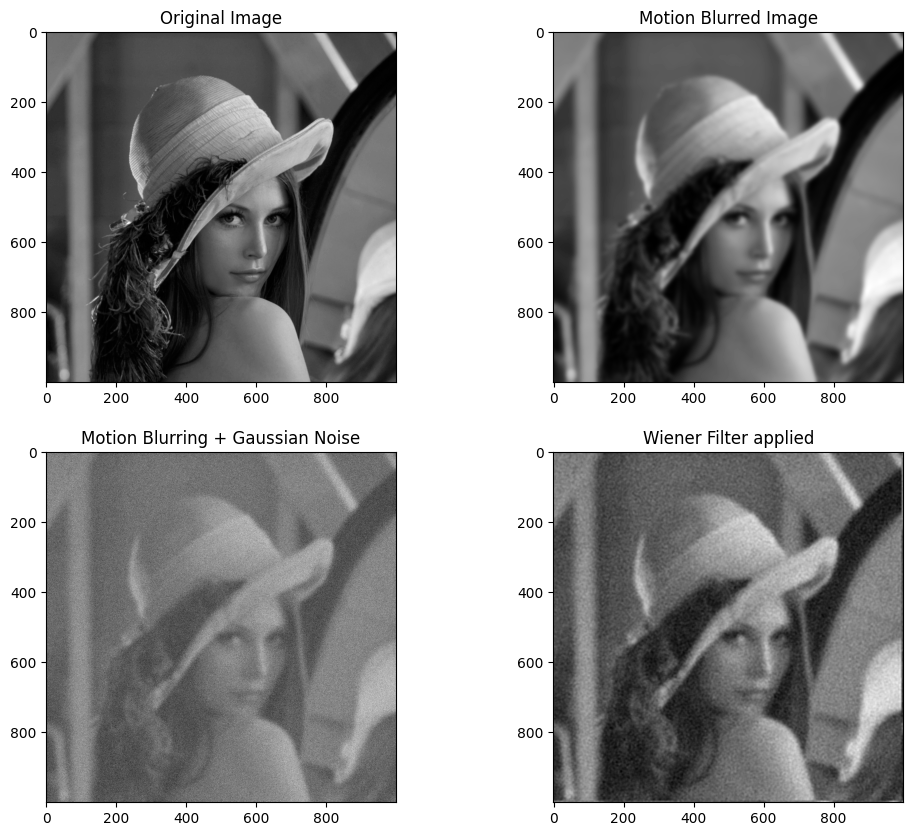

In [11]:
if __name__ == '__main__':
	# Load image and convert it to gray scale
	file_name = os.path.join('lena1000p.jpg') 
	img = rgb2gray(plt.imread(file_name))

	# Blur the image
	blurred_img = blur(img, sigma = 5)

	# Add Gaussian noise
	noisy_img = add_gaussian_noise(blurred_img,40)

	# Apply Wiener Filter
	kernel = gaussian_kernel(9)
	filtered_img = wiener_filter(noisy_img, kernel, K = 0.5)

	# Display results
	display = [img, blurred_img, noisy_img, filtered_img]
	label = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise', 'Wiener Filter applied']

	fig = plt.figure(figsize=(12, 10))

	for i in range(len(display)):
		fig.add_subplot(2, 2, i+1)
		plt.imshow(display[i], cmap = 'gray')
		plt.title(label[i])

	plt.show()

In [12]:
noisy_img_2 = noisy_img

In [13]:
cv2.PSNR(img,noisy_img)

11.916689388340453

In [14]:
cv2.PSNR(img,filtered_img)

20.766798011608458

In [15]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from skimage.metrics import structural_similarity as ssim

In [16]:
def add_gaussian_noise(image, mean, variance):
    gaussian_noise = np.random.normal(mean, np.sqrt(variance), image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip pixel values
    return noisy_image / 255.0  # Normalize pixel values to [0, 1]

In [17]:
lena_clean = img

In [18]:
lena_clean = lena_clean / 255.0  # Normalize pixel values to [0, 1]

In [21]:
num_noisy_images = 15
noise_mean = 0
noise_variance = 5  # Adjust as needed

# Generate multiple noisy versions of the Lena image
noisy_images = []
for _ in range(num_noisy_images):
    noisy_image = add_gaussian_noise(lena_clean, noise_mean, noise_variance)
    noisy_images.append(noisy_image)

In [22]:
noisy_images

[array([[0.        , 0.        , 0.01501468, ..., 0.        , 0.        ,
         0.00485784],
        [0.00142448, 0.00499314, 0.0129925 , ..., 0.00626435, 0.01675382,
         0.00338665],
        [0.01126371, 0.        , 0.        , ..., 0.00584029, 0.        ,
         0.00426081],
        ...,
        [0.00994785, 0.00865278, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00665228, 0.00617804, ..., 0.        , 0.        ,
         0.00125135],
        [0.00464878, 0.        , 0.00933215, ..., 0.        , 0.        ,
         0.01608268]]),
 array([[0.        , 0.00622516, 0.        , ..., 0.        , 0.00182769,
         0.        ],
        [0.00158067, 0.        , 0.        , ..., 0.00963078, 0.        ,
         0.01005486],
        [0.        , 0.        , 0.00272808, ..., 0.        , 0.00101045,
         0.00126035],
        ...,
        [0.        , 0.00289294, 0.        , ..., 0.        , 0.        ,
         0.01835727],
        [0.0

In [23]:
noisy_images = np.array(noisy_images)

In [24]:
noisy_images = np.expand_dims(noisy_images, axis=-1) 

In [25]:
input_img = Input(shape=(lena_clean.shape[0], lena_clean.shape[1], 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [27]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
filepath = 'autoencoder_weights.keras'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

In [29]:
lena_clean_reshaped = np.expand_dims(lena_clean,axis=(0,3))  # Add height, width, and channel dimensions
lena_clean_repeated = np.repeat(lena_clean_reshaped, num_noisy_images, axis=0)  # Repeat for each noisy image

# Train the autoencoder

In [30]:
history = autoencoder.fit(noisy_images, lena_clean_repeated, epochs=10, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 0.6934
Epoch 1: val_loss improved from inf to 0.69256, saving model to autoencoder_weights.keras
1/1 [==============================] - 38s 38s/step - loss: 0.6934 - val_loss: 0.6926
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 0.6926
Epoch 2: val_loss improved from 0.69256 to 0.69176, saving model to autoencoder_weights.keras
1/1 [==============================] - 28s 28s/step - loss: 0.6926 - val_loss: 0.6918
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 0.6918
Epoch 3: val_loss improved from 0.69176 to 0.69085, saving model to autoencoder_weights.keras
1/1 [==============================] - 27s 27s/step - loss: 0.6918 - val_loss: 0.6908
Epoch 4/10
1/1 [==============================] - ETA: 0s - loss: 0.6908
Epoch 4: val_loss improved from 0.69085 to 0.68971, saving model to autoencoder_weights.keras
1/1 [==============================] - 27s 27s/step - loss: 0.6908 - val_loss:

In [31]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000, 1000, 1)]   0         
                                                                 
 conv2d (Conv2D)             (None, 1000, 1000, 32)    320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 500, 500, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 500, 500, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 250, 250, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 32)      9248

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Training Loss:', loss)
print('Validation Loss:', val_loss)


Training Loss: [0.6933807730674744, 0.6925646662712097, 0.6917629837989807, 0.690846860408783, 0.6897101402282715, 0.6882883906364441, 0.6865601539611816, 0.6844180226325989, 0.6817770004272461, 0.6785366535186768]
Validation Loss: [0.6925646662712097, 0.6917627453804016, 0.6908467411994934, 0.6897100806236267, 0.6882883906364441, 0.6865599751472473, 0.6844179034233093, 0.6817767024040222, 0.6785361766815186, 0.674591064453125]


1/1 [==============================] - 1s 531ms/step


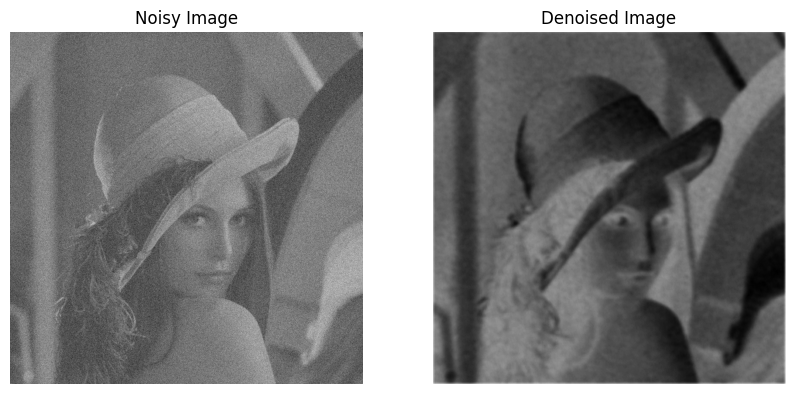

In [37]:
noisy_img_2 = add_gaussian_noise(img, sigma =50)
noisy_image = noisy_img_2
noisy_image = noisy_image / 255.0  # Normalize pixel values to [0, 1]
noisy_image = np.expand_dims(noisy_image, axis=-1)  # Add channel dimension

# Denoise the noisy image using the trained autoencoder
denoised_image = autoencoder.predict(np.array([noisy_image]))[0]

# Display both noisy and denoised images using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image[:, :, 0], cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image[:, :, 0], cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()

In [38]:
cv2.PSNR(img,noisy_img)

11.916689388340453

In [44]:
denoised_image = denoised_image.astype('uint8')
img = img.astype('uint8')

In [45]:
cv2.PSNR(img,denoised_image)

8.264664663441705